# Investigate the rate of growth of the outcome space

In [1]:
import time
import pickle
from netmechanism import FeaturesLattice
from netmechanism import est_outcome_space_size, outcome_space_ratio_calculator
import matplotlib.pyplot as plt
import matplotlib
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

In [ ]:
# Load data
path = 'D:/Thesis/Experiments/OutcomeSpaceSize/'
experiment_name = 'outcome_space_sizes'
with open(path + experiment_name, 'rb') as container:
    outcome_space_data = pickle.load(container)
execution_times = outcome_space_data[0]
feature_lattice_sizes = outcome_space_data[1]
outcome_space_sizes = outcome_space_data[2]
outcome_space_cov_sizes = outcome_space_data[3]

Investigation of the variation of the outcome space size increase with the targets and features lattices density for a range of dimensions.

In [3]:
# General parameters 
upper_bound = 1.0
lower_bound = -1.0
radius = 1.0
r_tol = 1e-5

In [4]:
# Experiment paramters
min_dim = 2
max_dim = 6
num_points_max = 15
num_points_min = 3

In [5]:
# Data storage structure
execution_times = {key: [] for key in range(min_dim, max_dim + 1)}
feature_lattice_sizes = {key: [] for key in range(min_dim, max_dim + 1)}
outcome_space_sizes = {key: [] for key in range(min_dim, max_dim + 1)}
outcome_space_cov_sizes = {key: [] for key in range(min_dim, max_dim + 1)}

In [6]:
# Estimate outcome space sizes and measure algorithm runtime 
for dim in range(min_dim, max_dim + 1):
    for num_points in range(num_points_min, num_points_max + 1):
        OutputLattice = FeaturesLattice()
        t_start = time.time()
        OutputLattice.generate_l2_lattice(dim = dim, radius = radius, lower_bound = lower_bound, upper_bound = upper_bound,\
                                          num_points = num_points, pos_ord = True, rel_tol = r_tol)
        t_end = time.time()
        execution_times[dim].append(t_end - t_start)
        feature_lattice_size = OutputLattice.points.shape[0]
        feature_lattice_sizes[dim].append(feature_lattice_size)
        outcome_space_sizes[dim].append(est_outcome_space_size(feature_lattice_size, dim, num_points))
        outcome_space_cov_sizes[dim].append(est_outcome_space_size(feature_lattice_size, dim, num_points, covariance_only = True))

In [7]:
# Save data
path = 'D:/Thesis/Experiments/OutcomeSpaceSize/'
experiment_name = 'outcome_space_sizes'
outcome_space_data = [execution_times, feature_lattice_sizes, outcome_space_sizes, outcome_space_cov_sizes]
with open(path + experiment_name, 'wb') as container:
    pickle.dump(outcome_space_data, container)

## Plots

### Outcome feature space size against lattice density (for both covariance and correlations release)

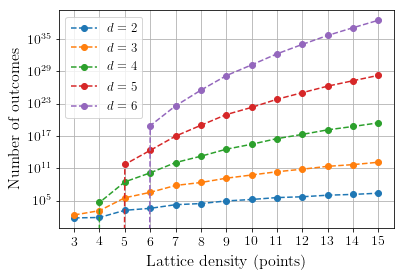

In [8]:
for dim in range(min_dim, max_dim + 1):
    plt.semilogy(range(num_points_min, num_points_max + 1), outcome_space_sizes[dim], '--o', label = r'$d = ' + str(dim) + '$')
plt.legend(fontsize = 13)
plt.xticks(range(num_points_min, num_points_max + 1))
plt.xlabel('Lattice density (points)', fontsize = 16)
plt.ylabel('Number of outcomes', fontsize = 16)
plt.grid(True)
plt.show()

In [9]:
# Can we solve the problem in six dimensions with 6 lattice points?
dim_1 = 6
dim_2 = 3
num_points_1 = 6
num_points_2 = 10
num_points_min = 3
ratio = outcome_space_ratio_calculator(outcome_space_sizes, dim_1, dim_2, num_points_1, num_points_2, num_points_min)
print ("Ratio of the {} case compared to the {} case is {}".format('(6, 6, 6)','(3, 10, 10)', str(ratio)))

Ratio of the (6, 6, 6) case compared to the (3, 10, 10) case is 1388423494.1287313


Based on the benchmark time of 95 s for (3,10,10), we conclude that it would take approximately 4182 years and 6 months to release the database...

NB: If we want to release the covariance only, then it is expected it would only take us 5.8 years...

In [13]:
# Can we solve the problem in four dimensions with 7 lattice points

In [17]:
dim_1 = 4
dim_2 = 3
num_points_1 = 7
num_points_2 = 10
num_points_min = 3
ratio = outcome_space_ratio_calculator(outcome_space_sizes, dim_1, dim_2, num_points_1, num_points_2, num_points_min)
print ("Ratio of the {} case compared to the {} case is {}".format('(4, 7, 7)','(3, 10, 10)', str(ratio)))

Ratio of the (4, 7, 7) case compared to the (3, 10, 10) case is 202.77500804012803


In [11]:
# Can we solve the problem in four dimensions with 12 lattice points?
dim_1 = 4
dim_2 = 3
num_points_1 = 12
num_points_2 = 10
num_points_min = 3
ratio = outcome_space_ratio_calculator(outcome_space_sizes, dim_1, dim_2, num_points_1, num_points_2, num_points_min)
print ("Ratio of the {} case compared to the {} case is {}".format('(4, 12, 12)','(3, 10, 10)', str(ratio)))

Ratio of the (4, 12, 12) case compared to the (3, 10, 10) case is 34352226.06905043


In about 2483 years and 7 months...

In [12]:
# How long will it take to solve (3, 12, 12) compared to (3, 10, 10)
dim_1 = 3
dim_2 = 3
num_points_1 = 12
num_points_2 = 10
num_points_min = 3
ratio = outcome_space_ratio_calculator(outcome_space_sizes, dim_1, dim_2, num_points_1, num_points_2, num_points_min)
print ("Ratio of the {} case compared to the {} case is {}".format('(3, 12, 12)','(3, 10, 10)', str(ratio)))

Ratio of the (4, 12, 12) case compared to the (3, 10, 10) case is 11.970934504944246


This should take about 20 minutes... :)

### Outcome feature space size against lattice density (for covariance only)

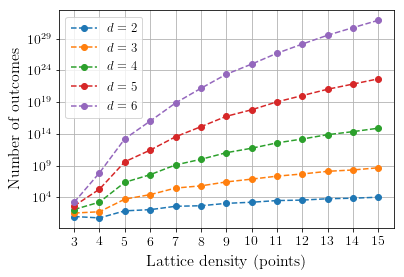

In [10]:
for dim in range(min_dim, max_dim + 1):
    plt.semilogy(range(num_points_min, num_points_max + 1), outcome_space_cov_sizes[dim], '--o', label = r'$d = ' + str(dim) + '$')
plt.legend(fontsize = 13)
plt.xticks(range(num_points_min, num_points_max + 1))
plt.xlabel('Lattice density (points)', fontsize = 16)
plt.ylabel('Number of outcomes', fontsize = 16)
plt.grid(True)
plt.show()